# What should the range in r be in part (c)?
# For part (d), what do they mean by zero crossings?
# For (d), what do they mean by scaling, does this mean just normalizing? Talk about issue of having different plots due to initial boundary condition of R(r=h). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array,arange

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
a = 5.2918e-11     # Bohr radius
h = 0.001*a  
r_inf = 20*a       #maxumum r value
eps_0 = 8.8542e-12 #permittivity of free space


# Potential function
def V(r):
    return -(e**2)/(4*np.pi*eps_0*r)

def f(RS,r,E,l):
    if(r>r_inf):
        RS[0] = 0
    if(r<h):
        RS[0] = 0
        
    R = RS[0]
    S = RS[1]
    
    fR = S/r**2
    fS = ((2*m*r**2)/hbar**2)*(V(r)-E)*R + l*(l+1)*R
    return array([fR,fS],float)

# Calculate the wavefunction for a particular energy
def solve(E,l):
    R = 0 #5190277381293640.0
    S = 1.0
    RS = array([R,S],float)
    R_list = []

    for r in arange(h,r_inf,h):
        R_list.append(RS[0])
        k1 = h*f(RS,r,E,l)
        k2 = h*f(RS+0.5*k1,r+0.5*h,E,l)
        k3 = h*f(RS+0.5*k2,r+0.5*h,E,l)
        k4 = h*f(RS+k3,r+h,E,l)
        RS += (k1+2*k2+2*k3+k4)/6
        

    return [RS[0],R_list]



# Part b

In [2]:
# Main program to find the energy using the secant method
n = 1
l = 0
E1 = -15*e/n**2
E2 = -13*e/n**2
psi2 = solve(E1,l)[0]

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2,l)[0]
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")
R1 = solve(E2,l)[1]

E = -13.552252492121182 eV


In [3]:
n = 2
l = 0
E1 = -15*e/n**2
E2 = -13*e/n**2
psi2 = solve(E1,l)[0]

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2,l)[0]
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")
R2 = solve(E2,l)[1]

E = -3.3943569034265857 eV


In [4]:
# Main program to find the energy using the secant method
n = 2
l = 1
E1 = -15*e/n**2
E2 = -13*e/n**2
psi2 = solve(E1,l)[0]

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2,l)[0]
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")
R3 = solve(E2,l)[1]

E = -3.401240575796026 eV


# Part c

In [20]:
#getting total area under curve of |R(r)^2| with trapezoid rule

#Using trapezoid rule code from Lecture 2 notes:

r_list = np.arange(h,r_inf,h)

def R_int(R):
    s = 0.5*R[0]**2 + 0.5*R[len(R)-1]**2 # the end bits
    for r in range(1,len(R)): # adding the interior bits
        s += R[r]**2
    
    return np.sqrt(h*s)


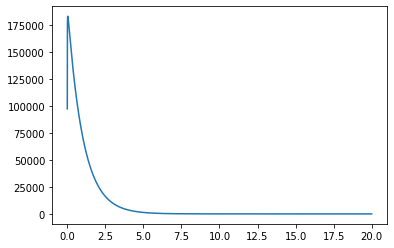

In [31]:
R1_int = R_int(R1)
n_R = R1/R1_int
plt.plot(r_list/a, n_R)

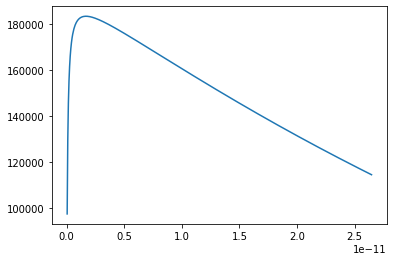

In [22]:
R2_int = R_int(R2)
n_R = R2/R2_int
plt.plot(r_list[:500], n_R[:500])

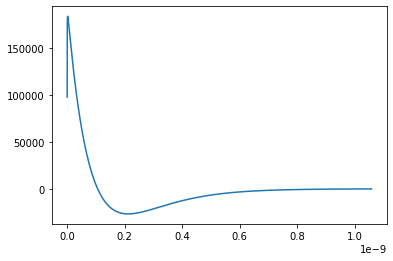

In [23]:
plt.plot(r_list, n_R)

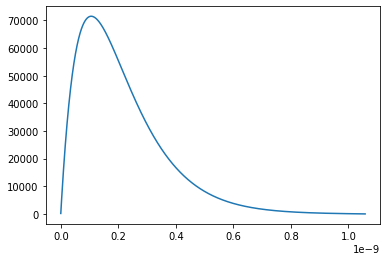

In [24]:
R3_int = R_int(R3)
n_R = R3/R3_int
plt.plot(r_list, n_R)

# Part D

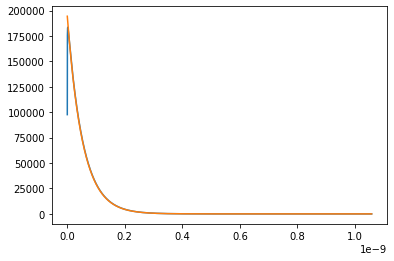

In [25]:
#n=1,l=0 case:
def fR1(r): #analytic version of R1(r) eigenfunction
    return (2/a**(3/2))*np.e**(-r/a)
    
R1_int = R_int(R1)
n_R = R1/R1_int
plt.plot(r_list, n_R)

#analytic version:
a_R1 = fR1(r_list)
a_R1_int = R_int(a_R1)
n_aR = a_R1/a_R1_int
plt.plot(r_list, n_aR, "")


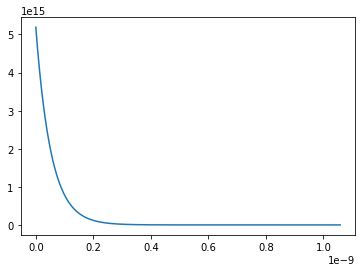

In [26]:
plt.plot(r_list, a_R1, "")

In [27]:
a_R1[0]

5190277381293640.0

# we can normalize by dividing by the first element

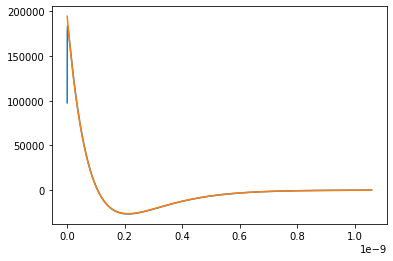

In [29]:
#n=2,l=0 case:
def fR2(r): #analytic version of R2(r) eigenfunction
    return (1/(2*np.sqrt(2)*a**(3/2)))*(2-r/a)*np.e**(-r/(2*a))
    
R2_int = R_int(R2)
n_R = R2/R2_int
plt.plot(r_list, n_R)

#analytic version:
a_R2 = fR2(r_list)
a_R2_int = R_int(a_R2)
n_aR = a_R2/a_R2_int
plt.plot(r_list, n_aR)

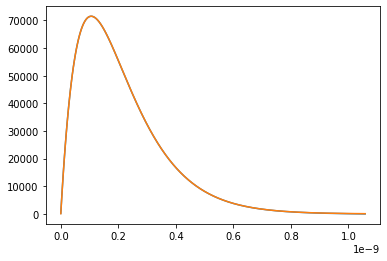

In [30]:
#n=2,l=1 case:
def fR3(r): #analytic version of R3(r) eigenfunction
    return (1/(2*np.sqrt(6)*a**(3/2)))*(r/a)*np.e**(-r/(2*a))
    
R3_int = R_int(R3)
n_R = R3/R3_int
plt.plot(r_list, n_R)

#analytic version:
a_R3 = fR3(r_list)
a_R3_int = R_int(a_R3)
n_aR = a_R3/a_R3_int
plt.plot(r_list, n_aR)